import pickle
import numpy as np
import matplotlib.pyplot as plt
prt = pickle.load(open('porous_rock_images_train.pkl', 'rb'))
ft = pickle.load(open('flux_train.pkl', 'rb'))
prtest  = pickle.load(open('porous_rock_images_test.pkl', 'rb'))
ftest = pickle.load(open('flux_test.pkl', 'rb'))
from gtda.homology import CubicalPersistence
train = prt[79]
print(train.shape)
fig, ax = plt.subplots()
im = ax.imshow(train)
CR = CubicalPersistence(homology_dimensions=[0, 1])
ptrain = CR.fit_transform(np.array([train]))
print(prtest.shape)


In [130]:
CR = CubicalPersistence(homology_dimensions=[0, 1])
pers = CR.fit_transform(prt)
perstest = CR.fit_transform(prtest)
CR.plot(pers,609)
CR.plot(perstest,23)

In [132]:
from gtda.diagrams import PersistenceLandscape
PL = PersistenceLandscape(n_layers=10,n_bins=100)
x= PL.fit_transform(pers)
xtest = PL.fit_transform(perstest)

In [134]:
PL.plot(xtest,32)


In [54]:
#linear regression of first layer of H0
import statsmodels.api as sm
xconst = sm.add_constant(x[:,0,:])
cubepersmodel = sm.OLS(ft,xconst)
cubepersresults = cubepersmodel.fit()
print(cubepersresults.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     9.150
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           7.57e-80
Time:                        11:44:11   Log-Likelihood:                 1642.1
No. Observations:                1000   AIC:                            -3098.
Df Residuals:                     907   BIC:                            -2642.
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.051e-13   2.63e-13      1.917      0.0

In [136]:
import sklearn.linear_model as skm
LIN = skm.LinearRegression()

[[0.         0.00991755 0.01983511 ... 0.         0.         0.        ]
 [0.         0.00991755 0.01983511 ... 0.         0.         0.        ]
 [0.         0.00991755 0.01983511 ... 0.         0.         0.        ]
 ...
 [0.         0.00991755 0.01983511 ... 0.         0.         0.        ]
 [0.         0.00991755 0.01983511 ... 0.         0.         0.        ]
 [0.         0.00991755 0.01983511 ... 0.         0.         0.        ]]


In [74]:
#linear regression of first layer of H0 and H1
import statsmodels.api as sm
x01  = np.concatenate((x[:,0,:],x[:,10,:]), axis=1)
x01c = sm.add_constant(x01)
cubepersmodel01 = sm.OLS(ft,x01c)
cubepersresults01 = cubepersmodel01.fit()
print(cubepersresults01.summary())
#note that adding a constant is pointless really as the first and last values in each vector is always 0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     7.713
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           9.76e-97
Time:                        12:04:40   Log-Likelihood:                 1830.7
No. Observations:                1000   AIC:                            -3279.
Df Residuals:                     809   BIC:                            -2342.
Df Model:                         190                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.735e-12   5.89e-12      1.483      0.1

In [73]:
#linear regression of first two layers of H0
import statsmodels.api as sm
x01  = np.concatenate((x[:,0,:],x[:,1,:]), axis=1)
x01c = sm.add_constant(x01)
cubepersmodel01 = sm.OLS(ft,x01c)
cubepersresults01 = cubepersmodel01.fit()
print(cubepersresults01.summary())
#note that adding a constant is pointless really as the first and last values in each vector is always 0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     6.130
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           8.53e-74
Time:                        12:04:33   Log-Likelihood:                 1742.4
No. Observations:                1000   AIC:                            -3121.
Df Residuals:                     818   BIC:                            -2227.
Df Model:                         181                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.31e-12   1.35e-12     -1.706      0.0

In [75]:
#Trying persistence landscape with less bins, allowing us to use data from all the layers

from gtda.diagrams import PersistenceLandscape
PLless = PersistenceLandscape(n_layers=10,n_bins=10)
xless= PLless.fit_transform(pers)

In [86]:
#linear regression of all layers
a,b,c = xless.shape
print(a,b,c)
xlessall = np.reshape(xless,[a,b*c,-1])[:,:,0]
xlessallc = sm.add_constant(xlessall)
cubepersmodelall = sm.OLS(ft,xlessallc)
cubepersresultsall = cubepersmodelall.fit()
print(cubepersresultsall.summary())
# we need to test these results on the training set, as the amount of parameters - 200 is high enough for our model to be over fitted

1000 20 10
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     14.00
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          1.61e-139
Time:                        11:54:29   Log-Likelihood:                 1857.3
No. Observations:                1000   AIC:                            -3467.
Df Residuals:                     876   BIC:                            -2858.
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5709      0.027     20.8

In [ ]:
#lets test this score on the testing data using scikit learn this time - should have started with this

1000


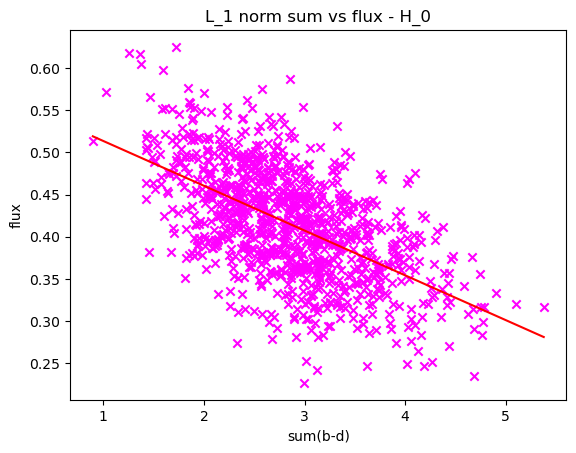

In [7]:
import numpy.polynomial.polynomial as npl
i = pers.shape[0]
print(i)
diff_sum_0 = np.zeros(i)
for x in range(i): 
    C = pers[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    diff_sum_0[x] = diff_sumC
_ = plt.scatter(diff_sum_0,ft, marker='x',color='magenta')
_ = plt.title('L_1 norm sum vs flux - H_0')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(diff_sum_0, ft, 1)
r = [min(diff_sum_0),max(diff_sum_0)]
_ = plt.plot([min(diff_sum_0),max(diff_sum_0)], np.array(m) * r + c, 'r')
plt.show()

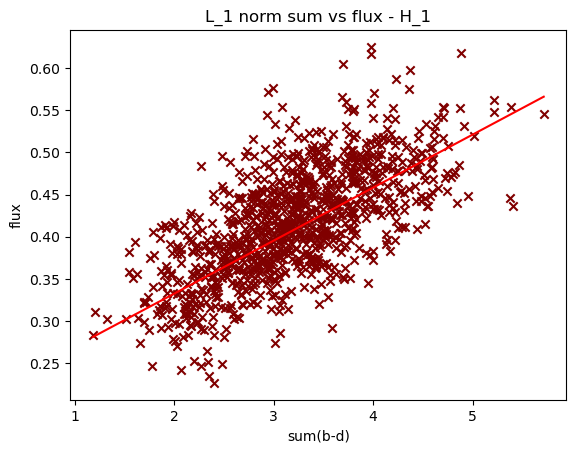

In [137]:
diff_sum_1 = np.zeros(i)
for x in range(i): 
    C = pers[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    diff_sum_1[x] = diff_sumC
_ = plt.scatter(diff_sum_1,ft, marker='x',color='maroon')
_ = plt.title('L_1 norm sum vs flux - H_1')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(diff_sum_1, ft, 1)
r = [min(diff_sum_0),max(diff_sum_1)]
_ = plt.plot([min(diff_sum_1),max(diff_sum_1)], np.array(m) * r + c, 'r')
plt.show()

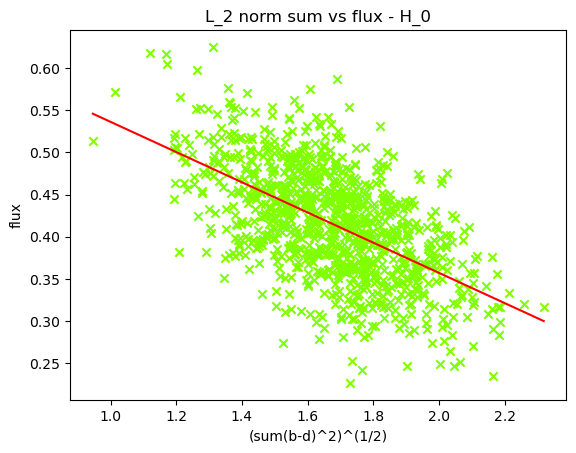

In [139]:
diff_sum_0_L2 = np.zeros(i)
for x in range(i): 
    C = pers[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    diff_sum_0_L2[x] = diff_sumCL2
_ = plt.scatter(diff_sum_0_L2,ft, marker='x',color='chartreuse')
_ = plt.title('L_2 norm sum vs flux - H_0')
_ = plt.xlabel('(sum(b-d)^2)^(1/2)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(diff_sum_0_L2, ft, 1)
r = [min(diff_sum_0_L2),max(diff_sum_0_L2)]
_ = plt.plot([min(diff_sum_0_L2),max(diff_sum_0_L2)], np.array(m) * r + c, 'r')
plt.show()

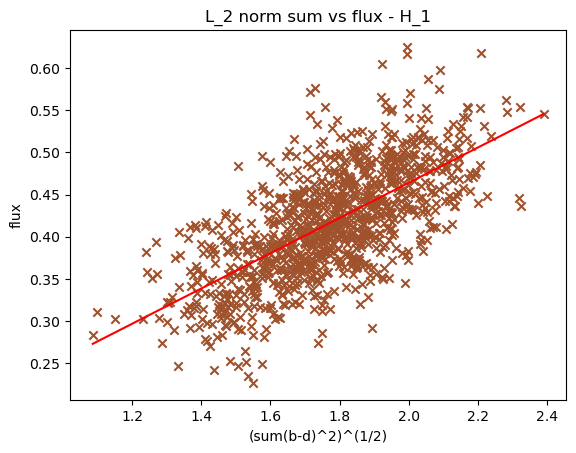

In [140]:
diff_sum_1_L2 = np.zeros(i)
for x in range(i): 
    C = pers[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    diff_sum_1_L2[x] = diff_sumCL2
_ = plt.scatter(diff_sum_1_L2,ft, marker='x',color='sienna')
_ = plt.title('L_2 norm sum vs flux - H_1')
_ = plt.xlabel('(sum(b-d)^2)^(1/2)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(diff_sum_1_L2, ft, 1)
r = [min(diff_sum_1_L2),max(diff_sum_1_L2)]
_ = plt.plot([min(diff_sum_1_L2),max(diff_sum_1_L2)], np.array(m) * r + c, 'r')
plt.show()

Text(0, 0.5, 'flux')

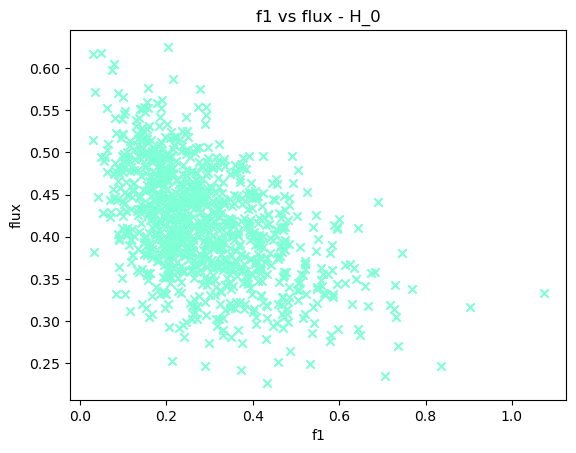

In [95]:
#now im going to use the most commonly used algebraic functions of this type: seen in https://arxiv.org/pdf/2212.09703.pdf
#first f1 = sum(p(p-q))
diff_sum_0_f1 = np.zeros(i)
for x in range(i): 
    C = pers[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,0] * (CH[:,1] - CH[:,0])
    diff_sumC = np.sum(diff_vectC)
    diff_sum_0_f1[x] = diff_sumC
plt.scatter(diff_sum_0_f1,ft, marker='x',color='aquamarine')
plt.title('f1 vs flux - H_0')
plt.xlabel('f1')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

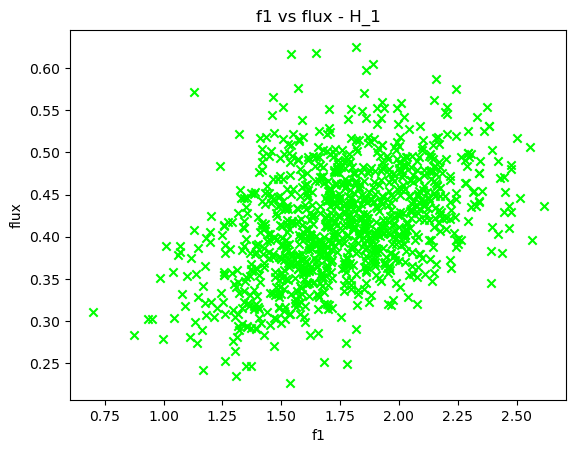

In [93]:
diff_sum_1_f1 = np.zeros(i)
for x in range(i): 
    C = pers[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,0] * (CH[:,1] - CH[:,0])
    diff_sumC = np.sum(diff_vectC)
    diff_sum_1_f1[x] = diff_vectC
plt.scatter(diff_sum_1_f1,ft, marker='x',color='lime')
plt.title('f1 vs flux - H_1')
plt.xlabel('f1')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

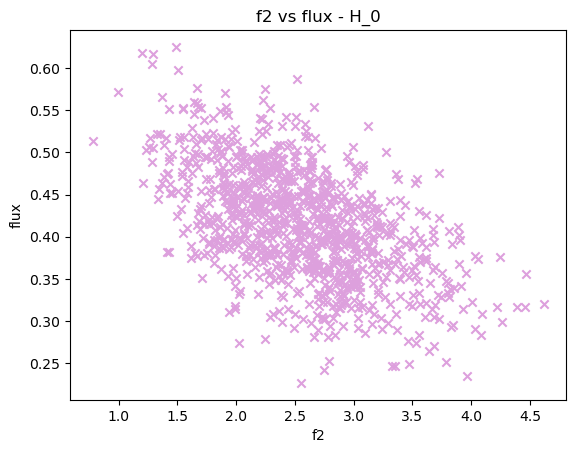

In [98]:
#f2 = sum((q_max-q)(q-p))
diff_sum_0_f2 = np.zeros(i)
for x in range(i): 
    C = pers[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    q_max = max(C[:,1])
    q_max_vect = q_max * np.ones(CH.shape[0])
    diff_vectC = (q_max_vect - CH[:,0]) * (CH[:,1] - CH[:,0])
    diff_sum_0_f2[x] = np.sum(diff_vectC)
plt.scatter(diff_sum_0_f2,ft, marker='x',color='plum')
plt.title('f2 vs flux - H_0')
plt.xlabel('f2')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

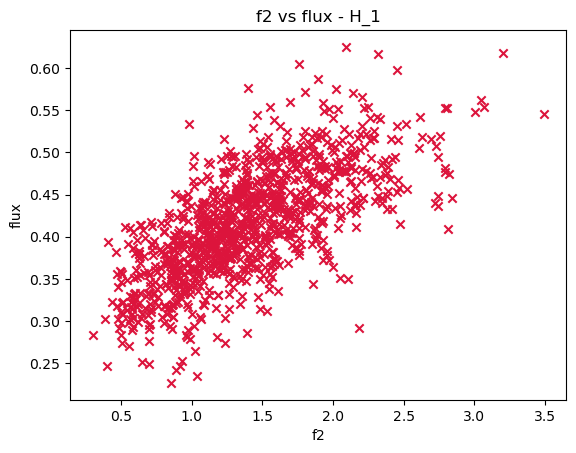

In [97]:
diff_sum_1_f2 = np.zeros(i)
for x in range(i): 
    C = pers[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    q_max = max(C[:,1])
    q_max_vect = q_max * np.ones(CH.shape[0])
    diff_vectC = (q_max_vect - CH[:,0]) * (CH[:,1] - CH[:,0])
    diff_sum_1_f2[x] = np.sum(diff_vectC)
plt.scatter(diff_sum_1_f2,ft, marker='x',color='crimson')
plt.title('f2 vs flux - H_1')
plt.xlabel('f2')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

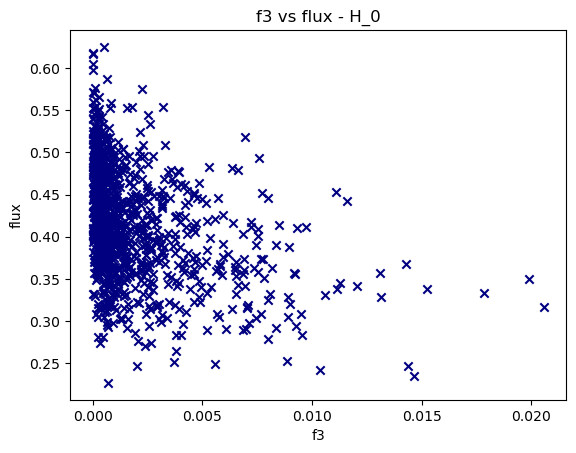

In [109]:
# f3 = sum(p^2(q-p)^4)
diff_sum_0_f3 = np.zeros(i)
for x in range(i): 
    C = pers[x,:,:]
    CH = C[np.where( C[:,2]== 0,)]
    P = CH[:,0]
    Q = CH[:,1]
    diff_vectC = P * P * (Q-P) * (Q-P) * (Q-P) * (Q-P)
    diff_sumC = np.sum(diff_vectC)
    diff_sum_0_f3[x] = diff_sumC
plt.scatter(diff_sum_0_f3,ft, marker='x',color='navy')
plt.title('f3 vs flux - H_0')
plt.xlabel('f3')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

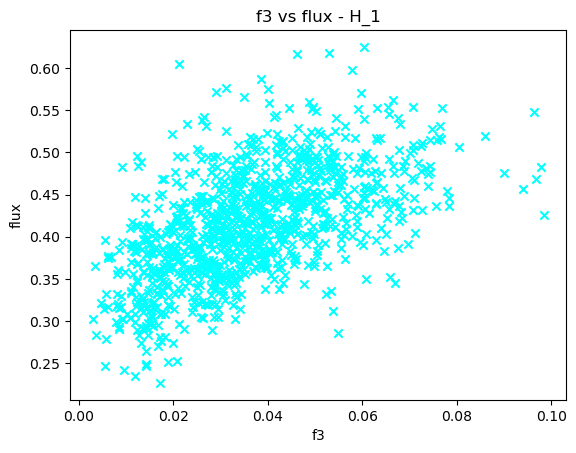

In [115]:
diff_sum_1_f3 = np.zeros(i)
for x in range(i): 
    C = pers[x,:,:]
    CH = C[np.where( C[:,2]== 1,)]
    P = CH[:,0]
    Q = CH[:,1]
    diff_vectC = P * P * (Q-P) * (Q-P) * (Q-P) * (Q-P)
    diff_sumC = np.sum(diff_vectC)
    diff_sum_1_f3[x] = diff_sumC
plt.scatter(diff_sum_1_f3,ft, marker='x',color='cyan')
plt.title('f3 vs flux - H_1')
plt.xlabel('f3')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

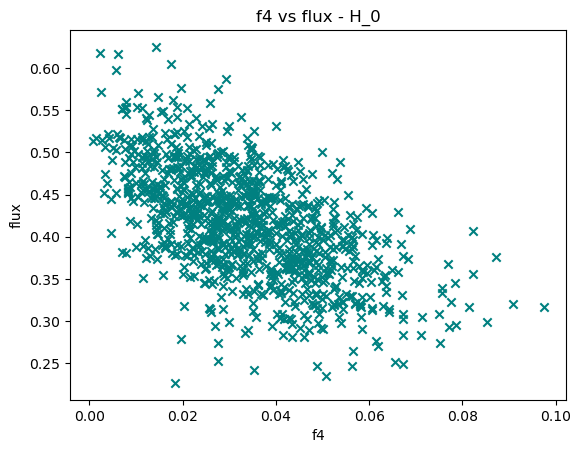

In [111]:
# f4 = sum((qmax-q)^2(q-p)^4)
diff_sum_0_f4 = np.zeros(i)
for x in range(i): 
    C = pers[x,:,:]
    CH = C[np.where( C[:,2]== 0,)]
    P = CH[:,0]
    Q = CH[:,1]
    qmax = max(C[:,1])
    Qmax = q_max * np.ones(CH.shape[0])
    diff_vectC = (Qmax-Q) * (Qmax-Q) * (Q-P) * (Q-P) * (Q-P) * (Q-P)
    diff_sumC = np.sum(diff_vectC)
    diff_sum_0_f4[x] = diff_sumC
plt.scatter(diff_sum_0_f4,ft, marker='x',color='teal')
plt.title('f4 vs flux - H_0')
plt.xlabel('f4')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

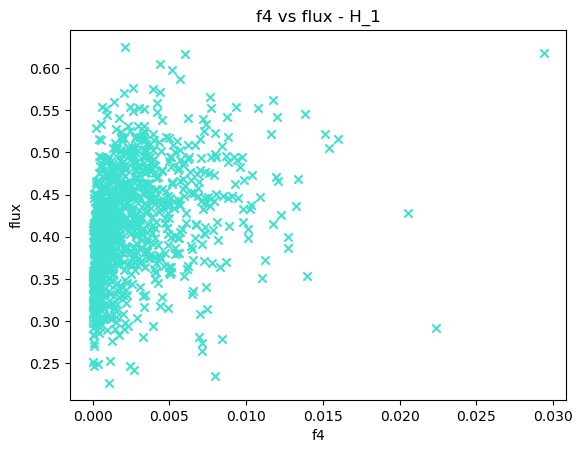

In [113]:
diff_sum_1_f4 = np.zeros(i)
for x in range(i): 
    C = pers[x,:,:]
    CH = C[np.where( C[:,2]== 1,)]
    P = CH[:,0]
    Q = CH[:,1]
    qmax = max(C[:,1])
    Qmax = q_max * np.ones(CH.shape[0])
    diff_vectC = (Qmax-Q) * (Qmax-Q) * (Q-P) * (Q-P) * (Q-P) * (Q-P)
    diff_sumC = np.sum(diff_vectC)
    diff_sum_1_f4[x] = diff_sumC
plt.scatter(diff_sum_1_f4,ft, marker='x',color='turquoise')
plt.title('f4 vs flux - H_1')
plt.xlabel('f4')
plt.ylabel('flux')

In [120]:
#linear regression using polynomial fit
import numpy.polynomial.polynomial as npl
# L1 norm, H_0
linreg_0 = npl.polyfit(diff_sum_0, ft, 1)
linreg_1 = npl.polyfit(diff_sum_1, ft, 1)
linreg_0_L2 = npl.polyfit(diff_sum_0_L2, ft, 1)
linreg_1_L2 = npl.polyfit(diff_sum_1_L2, ft, 1)

linreg_0




(array([ 0.48133075, -0.23107722]),
 [array([3.2035626]),
  2,
  array([1.37789263, 0.31845233]),
  2.220446049250313e-13])